<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 6- Natural Language Processing

_Preprocessing for Topic Modelling_

---
### Notebook Summary
 
- Introduction to the `Natural` `Language` `Toolkit` aka `NLTK`

- `Engineered Functions` to extract desired information on each article

- Light `DataMunging` in order to properly assemble a final `IdeasDataFrame` to be used in subsequent notebooks
---
#### Importing Necessary Libraries

In [17]:
import pandas as pd
import numpy as np

#### Importing Scraped Article Content 

In [18]:
natural_language = pd.read_csv('Content.csv')
natural_language.drop('Unnamed: 0',axis=1,inplace=True)
natural_language.head()

0
0  Rethink Technology business briefs for July 21...
1  \n\n Company Description Apple is one of the m...
2   Last week, I discussed the possibility of App...
3   Apple (AAPL) Q3 earnings will be released ove...
4   This article is about Apple (AAPL) and why it...


---
## Uncleaned Analysis
_Prior to preprocessing with the NLTK_
 
- Top 50 Word Frequencies 
- Understanding the need for preprocessing before building machine learning algorithms
---

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]), <a list of 10 Text yticklabel objects>)

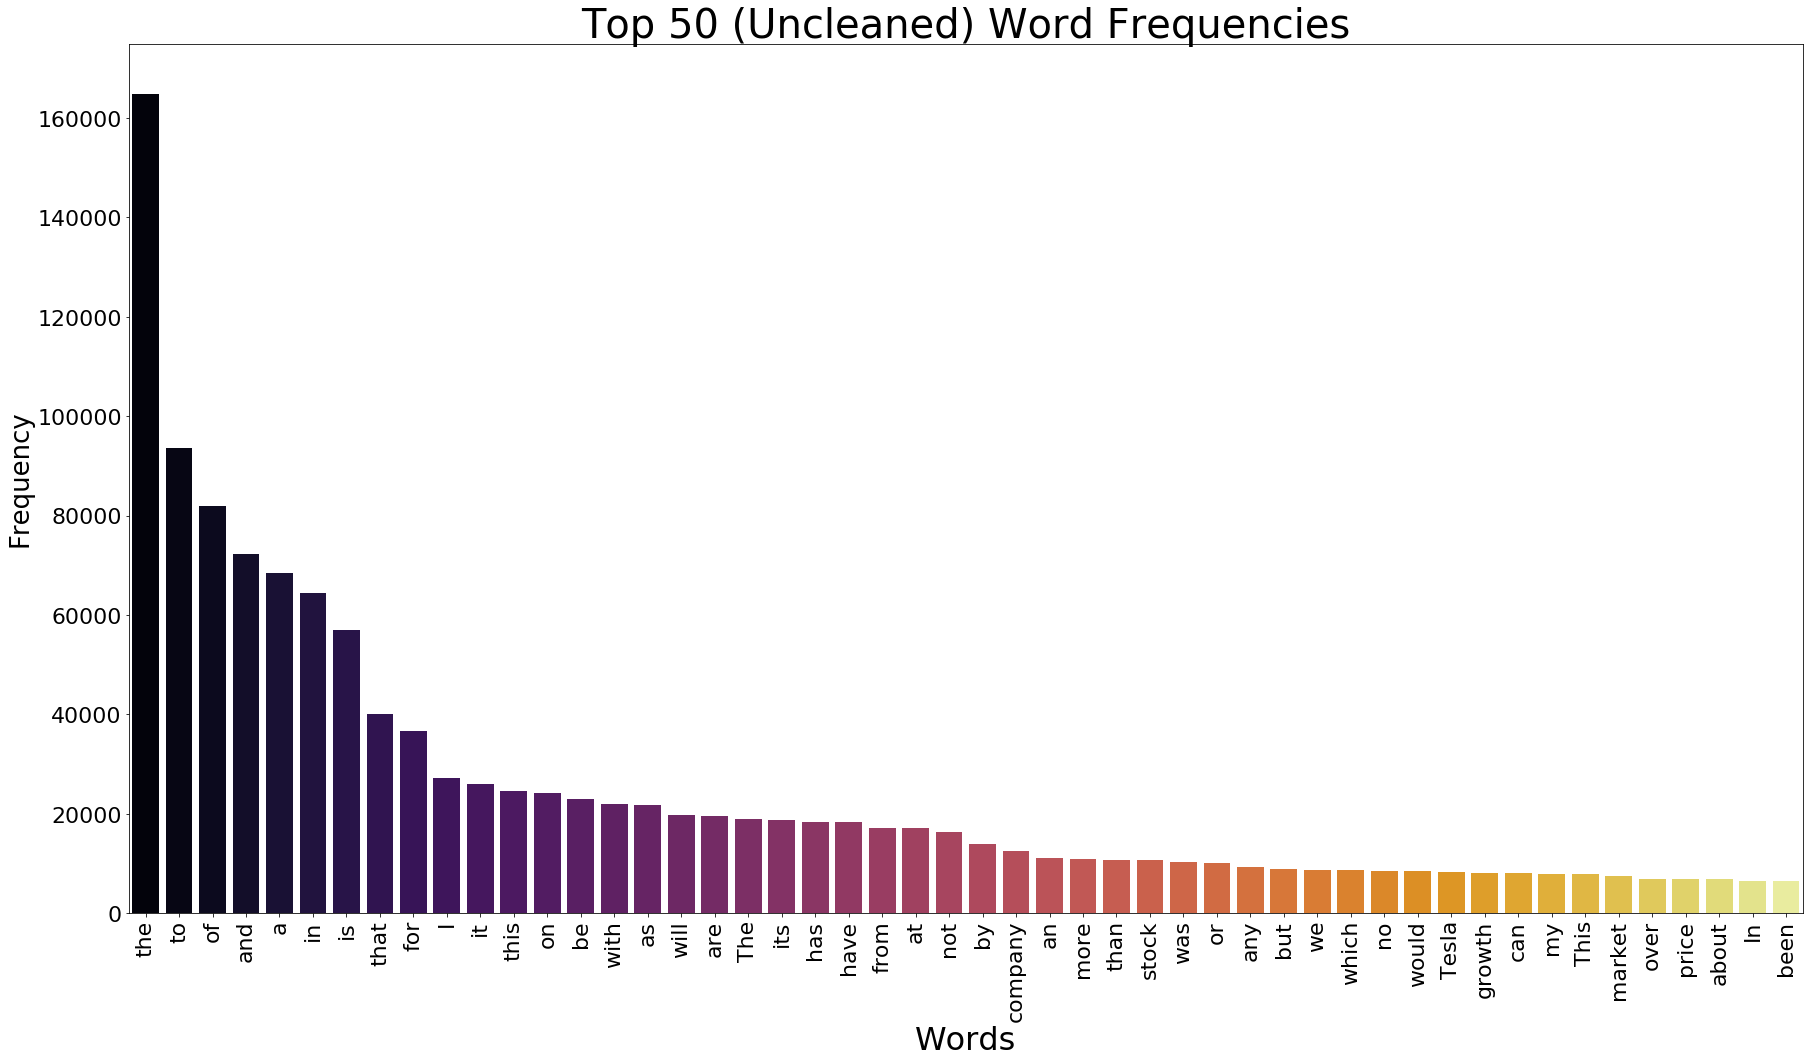

In [19]:
natural_language_uncleaned = natural_language['0'] # compiling list of all article text from 'natural_language'

# Calcuating value counts for each word- Top 50 frequencies 
natural_language_uncleaned = natural_language_uncleaned.str.split(expand=True).unstack().value_counts().head(50)

# Creating bar graph to visualize

plt.figure(figsize=(30,16))
sns.barplot(x = natural_language_uncleaned.index.values,
            y = natural_language_uncleaned.values,
            palette= 'inferno')

plt.xlabel('Words',fontsize=32)
plt.ylabel('Frequency',fontsize=26)
plt.ylim(0,175000)
plt.title('Top 50 (Uncleaned) Word Frequencies',fontsize=40)
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=22)

In [23]:
natural_language_uncleaned[:11]

the     164901
to       93541
of       81936
and      72393
a        68506
in       64389
is       56977
that     40131
for      36639
I        27284
it       26067
dtype: int64

- Without preprocessing with Natural Language Processing, word frequencies don't bring much to the table.
- Currently, words are those that would be found in almost any other English text
- Let's explore another fun visualization tool to demonstrate.

(-0.5, 399.5, 199.5, -0.5)

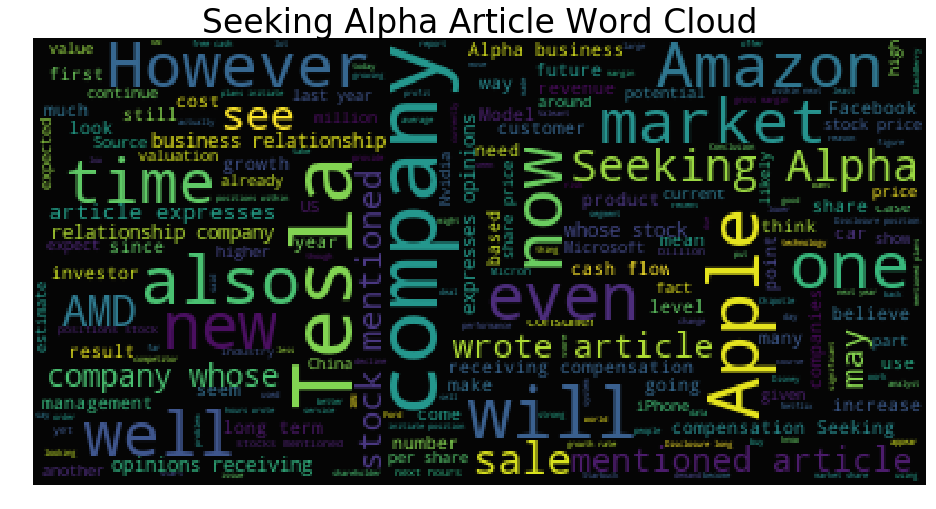

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, max_font_size= 40)
wc.generate(" ".join(natural_language['0']))
plt.title("Seeking Alpha Article Word Cloud", fontsize=33)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98)
plt.axis('off')

- The Word Cloud visualizes the need to remove these unpredictive words, as well. 
- It's clear we must find some way to preprocess our dataset to strip out these commonly occuring words

In [ ]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(natural_language['0']))
plt.title("Seeking Alpha Article Word Cloud", fontsize=33)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98)
plt.axis('off')

## Preprocessing and Natural Language Processing 
- Raw article text is converted into a form readable by modelling techniques and machine learning algorithms through preproccesing steps
- Preprocessing is aided heavily with Natural Language Processing (NLP), exploring interactions between computers and human languages
- NLP is most commonly peformed with the Natural Language Toolkit (NLTK)
- To explore how these techniques can transform raw text, let'a explore them on an example article from what was scraped in the previous notebook

In [25]:
# Getting first 
example = natural_language['0'][0]

In [26]:
example

"Rethink Technology business briefs for July 21, 2017  Report further substantiates Apple's interest in electric vehicles  \n\n Source: Cult of Mac The Chinese company reportedly working with Apple (NASDAQ:AAPL) is Contemporary Amperex Technology Ltd. (CATL). Not much is known about the agreement between the two companies except that it's confidential (of course) and directed at automotive battery research and development. Interestingly, CATL and Apple have some history. CATL was spun off from the battery division of Amperex Technology in 2011. Amperex is the largest battery supplier for Apple's products. Many of CATL's shareholders were Amperex executives. So it is at least plausible that Apple is building on its long-standing working relationship with Amperex. Even if true, the report doesn't mean that Apple will actually market a BEV at some point in the future. I'm sure that's still decisionable, but I remain convinced that Apple's interest is not merely in developing software or a

---
### 1. Removing Punctuation
- Utilize `regular` expressions to 'find-and-replace'
- Find punctuation and replace with blank space
- Return only letters  
---

In [27]:
import re

# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example)  # The text to search
print(letters_only)

Rethink Technology business briefs for July           Report further substantiates Apple s interest in electric vehicles     Source  Cult of Mac The Chinese company reportedly working with Apple  NASDAQ AAPL  is Contemporary Amperex Technology Ltd   CATL   Not much is known about the agreement between the two companies except that it s confidential  of course  and directed at automotive battery research and development  Interestingly  CATL and Apple have some history  CATL was spun off from the battery division of Amperex Technology in       Amperex is the largest battery supplier for Apple s products  Many of CATL s shareholders were Amperex executives  So it is at least plausible that Apple is building on its long standing working relationship with Amperex  Even if true  the report doesn t mean that Apple will actually market a BEV at some point in the future  I m sure that s still decisionable  but I remain convinced that Apple s interest is not merely in developing software or an a

---
### 2. Formatting
- Converting all words to `lowercase` expressions to 'find-and-replace'
- Splitting text up into indiviudal words 
---

In [28]:
# Convert to lower case, split into individual words
words = letters_only.lower().split()  
print(words)

['rethink', 'technology', 'business', 'briefs', 'for', 'july', 'report', 'further', 'substantiates', 'apple', 's', 'interest', 'in', 'electric', 'vehicles', 'source', 'cult', 'of', 'mac', 'the', 'chinese', 'company', 'reportedly', 'working', 'with', 'apple', 'nasdaq', 'aapl', 'is', 'contemporary', 'amperex', 'technology', 'ltd', 'catl', 'not', 'much', 'is', 'known', 'about', 'the', 'agreement', 'between', 'the', 'two', 'companies', 'except', 'that', 'it', 's', 'confidential', 'of', 'course', 'and', 'directed', 'at', 'automotive', 'battery', 'research', 'and', 'development', 'interestingly', 'catl', 'and', 'apple', 'have', 'some', 'history', 'catl', 'was', 'spun', 'off', 'from', 'the', 'battery', 'division', 'of', 'amperex', 'technology', 'in', 'amperex', 'is', 'the', 'largest', 'battery', 'supplier', 'for', 'apple', 's', 'products', 'many', 'of', 'catl', 's', 'shareholders', 'were', 'amperex', 'executives', 'so', 'it', 'is', 'at', 'least', 'plausible', 'that', 'apple', 'is', 'building'

---
### 3. Removing Stop Words
- Stopwords occur so frequently in a document that they do not contribute to the predictive process
- To distinguish texts properly we should remove these words during pre-processing
- The NLTK comes with a predefined list of 179 English stopwords that will effectively remove words such as "to" and "the", etc.
- Please see below that the article exmplae with stopwords removed is substantially shorter than before.
---

In [29]:
import nltk

# Gathering list of stop words from the Natural Language Toolkit 
stopwords = nltk.corpus.stopwords.words('english')

In [30]:
print("="*90)
print('There are',len(stopwords),'English stop words in the NLTK.')
print("="*90)

There are 179 English stop words in the NLTK.


In [31]:
example_stopwords_removed = [w for w in words if not w in stopwords] 

In [34]:
print("="*90)
print('There are',len(example),'in the original article text.')
print('There are',len(example_stopwords_removed),'in article text after stop word removal.')
print("="*90)

There are 6727 in the original article text.
There are 604 in article text after stop word removal.


In [ ]:
# Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.

---
### Applying Function To All Articles 
- Cleaning steps can be combined into a function in order to apply to all scraped article texts
    1. Removing non-letters
    2. Formatting (converting to lower-case)
    3. Removing stop-words
---

In [5]:
text = " ".join(natural_language['0'])

In [7]:
def article_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    # 
    #
    # 2. Remove non-letters 
    letters_only = re.sub("[^a-zA-Z]", " ", text)                  
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords)                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join( meaningful_words ))

In [8]:
# Get the number of reviews based on the dataframe column size
num_articles = natural_language['0'].size

# Initialize an empty list to hold the clean reviews
cleaned_articles = []

In [13]:
print("Cleaning and parsing the training set movie reviews...\n")
clean_articles = []
for i in range( 0, num_articles):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%10 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_articles))                                                                    
    clean_articles.append(article_to_words(natural_language['0'][i]))

Cleaning and parsing the training set movie reviews...

Review 10 of 2695

Review 20 of 2695

Review 30 of 2695

Review 40 of 2695

Review 50 of 2695

Review 60 of 2695

Review 70 of 2695

Review 80 of 2695

Review 90 of 2695

Review 100 of 2695

Review 110 of 2695

Review 120 of 2695

Review 130 of 2695

Review 140 of 2695

Review 150 of 2695

Review 160 of 2695

Review 170 of 2695

Review 180 of 2695

Review 190 of 2695

Review 200 of 2695

Review 210 of 2695

Review 220 of 2695

Review 230 of 2695

Review 240 of 2695

Review 250 of 2695

Review 260 of 2695

Review 270 of 2695

Review 280 of 2695

Review 290 of 2695

Review 300 of 2695

Review 310 of 2695

Review 320 of 2695

Review 330 of 2695

Review 340 of 2695

Review 350 of 2695

Review 360 of 2695

Review 370 of 2695

Review 380 of 2695

Review 390 of 2695

Review 400 of 2695

Review 410 of 2695

Review 420 of 2695

Review 430 of 2695

Review 440 of 2695

Review 450 of 2695

Review 460 of 2695

Review 470 of 2695

Review 480 of

In [37]:
# Initializing 'Count-Vectorizer', scikit learns bag of words tool 
vectorizer = CountVectorizer(analyzer='word',max_features=5000)

In [ ]:
vectorizer.fit_transform(clean_articles)

In [ ]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [32]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') ## We'll talk about this in a moment.

In [ ]:
# Storing the entire training text in a list
text = list(natural_language['0'].values)
# Calling our overwritten Count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

Revisiting our Term frequencies

Having implemented our lemmatized count vectorizer, let us revist the plots for the term frquencies of the top 50 words (by frequency). As you can see from the plot, all our prior preprocessing efforts have not gone to waste. With the removal of stopwords, the remaining words seem much more meaningful where you can see that all the stopwords in the earlier term frequency plot

In [ ]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))

In [ ]:
count_vec

In [ ]:
feature_names

In [ ]:
x = x[:50]
y = y[:50]

In [ ]:
plt.figure(figsize=(20,16))
sns.barplot(x = x, y = y)

plt.xlabel('Words',fontsize=32)
plt.ylabel('Frequency',fontsize=26)
plt.ylim(0,1600)
plt.title('Top 50 (Cleaned) Word Frequencies',fontsize=40)
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=22)

## Latent Dirichlet Allocation
Finally we arrive on the subject of topic modelling and the implementation of unsupervised learning algorithms. 
Using Sklearn's and Gensim implementations. 

Corpus - Document - Word : Topic Generation

In LDA, the modelling process revolves around three things: the text corpus, its collection of documents, D and the words W in the documents. Therefore the algorithm attempts to uncover K topics from this corpus via the following way (illustrated by the diagram)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [ ]:
from gensim import corpora, models
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

np.random.seed(42)

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
def text_process(text):
    for each in text: 
        processed = []
        
        tokenizer = RegexpTokenizer(r'\w+')
        token = tokenizer.tokenize(yo)

        stopwords = nltk.corpus.stopwords.words('english')
        cleaned = [word for word in token if word.lower() not in stopwords]

        porter_stemmer = PorterStemmer()
        stemmed =  [stemmer.stem(word) for word in cleaned]

        processed.append(stemmed)
        
        return(processed)

In [ ]:
texts = text_process(text)

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, 
                                    id2word = dictionary, 
                                    num_topics = 10, 
                                    passes = 5, 
                                    minimum_probability=0.2)

In [ ]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [ ]:
for i in ldamodel.print_topics(num_topics=5, num_words=5):
    print(i)

In [ ]:
yo = text[0]
yo

In [ ]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [ ]:
lda.fit(tf)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)